# Baseline-model experiments Michael

## Basic setup

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report,\
    f1_score, ConfusionMatrixDisplay, roc_auc_score

# increase number of displayed df columns, since our data has quite a lot
# (default is 20)
pd.options.display.max_columns = None

## Load and split data

In [8]:
# merged_data.csv contains only complete observations (~ 450,000 of a total 2M)
# 'toxic' column = target! (1 if 'toxicity' >= 0.5)
df = pd.read_csv('data/merged_data.csv')

y = df['toxic']
X = df.drop('toxic', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# all_data.csv contains full dataset (only ~ 25% of which is labelled for
# identity)
#df = pd.read_csv('data/all_data.csv')

## Create variable to store experiment results
Can be viewed with VSC variable/data viewer.

In [9]:
experiments = [{'model_name': '',
                'data_len': 0,
                'auc': 0.0,
                'acc': 0.0,
                'f1': 0.0,
                'notes': ''}]

## DummyClassifier
### strategy='stratified'

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     99318
           1       0.11      0.11      0.11     12682

    accuracy                           0.80    112000
   macro avg       0.50      0.50      0.50    112000
weighted avg       0.80      0.80      0.80    112000



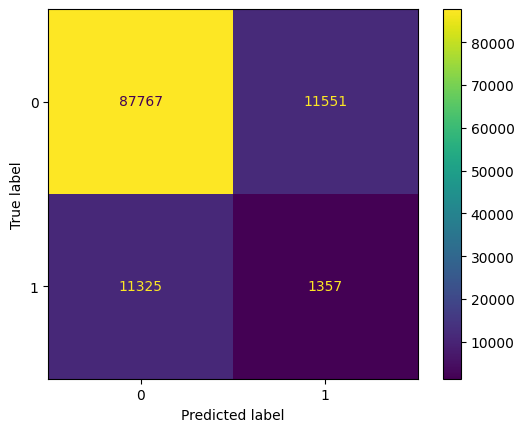

In [10]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)

y_test_pred = dummy_clf.predict(X_test)
y_test_pred_proba = dummy_clf.predict_proba(X_test)[:,1]

# Input for roc_auc_score() must be probabilities from .predict_proba,
# not predictions from .predict! There's no error raised and the result
# looks okay, although it's wrong! I've walked into this trap a couple
# of times during bootcamp, so watch out!
auc = roc_auc_score(y_test, y_test_pred_proba)

acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

experiments.append({'model_name': 'DummyClassifier',
                'data_len': len(df),
                'auc': auc,
                'acc': acc,
                'f1': f1,
                'notes': 'strategy=stratified'})

print(classification_report(y_test, y_test_pred))

ConfusionMatrixDisplay.from_estimator(dummy_clf, X_test, y_test);

### strategy='prior'
Default strategy, basically the same as 'most_frequent'.

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     99318
           1       0.00      0.00      0.00     12682

    accuracy                           0.89    112000
   macro avg       0.44      0.50      0.47    112000
weighted avg       0.79      0.89      0.83    112000



/Users/mschick/nf-bootcamp/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mschick/nf-bootcamp/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mschick/nf-bootcamp/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

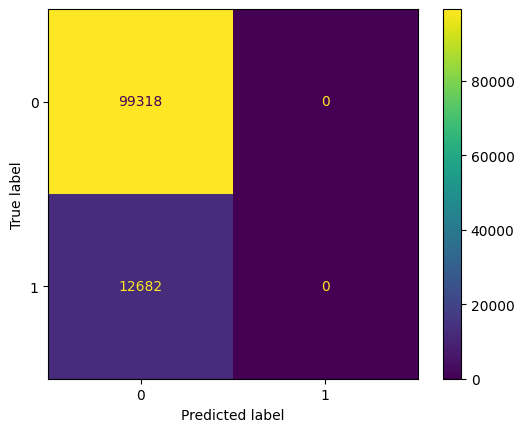

In [11]:
dummy_clf = DummyClassifier(strategy='prior')
dummy_clf.fit(X_train, y_train)

y_test_pred = dummy_clf.predict(X_test)
y_test_pred_proba = dummy_clf.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_test_pred_proba)

acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

experiments.append({'model_name': 'DummyClassifier',
                'data_len': len(df),
                'auc': auc,
                'acc': acc,
                'f1': f1,
                'notes': 'strategy=prior'})

print(classification_report(y_test, y_test_pred))

ConfusionMatrixDisplay.from_estimator(dummy_clf, X_test, y_test);